# Evaluation Frameworks: Data Partitioning

We have to split the series into two time-periods maintaining the temporal order of the series. Methods include:

- Single Train-Test Split
- Multiple Train-Test Split
- Time Series Cross-Validation

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
plt.style.use("seaborn-whitegrid")

## Single Train-Test Split

We can split our dataset into training and test subsets, the model can be developed on the training dataset and its performance can be evaluated on the test dataset. This can be done by selecting a split point on the sequential observations (e.g., 60:40,70:30 or 80:20) based on the length of the time series available.

Let’s understand this with the following example, there are a total of 20 time periods, the first 15 (blue points) can be used to train the model and the last 5 (red points) can be used to validate the forecasting accuracy.

<img src="https://raw.githubusercontent.com/lucaskienast/Time-Series-Analysis/main/2)%20Evaluation%20Frameworks/Single%20Train-Test%20Split.jpeg">


In [2]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, parse_dates=True)
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# define train-test split proportions
train_size = int(df.shape[0] * 0.7)
train = df.iloc[:train_size]
test = df.iloc[train_size:]
print("Observations: {}".format(df.shape[0]))
print("Training Observations: {}".format(train.shape[0]))
print("Testing Observations: {}".format(test.shape[0]))

Observations: 144
Training Observations: 100
Testing Observations: 44


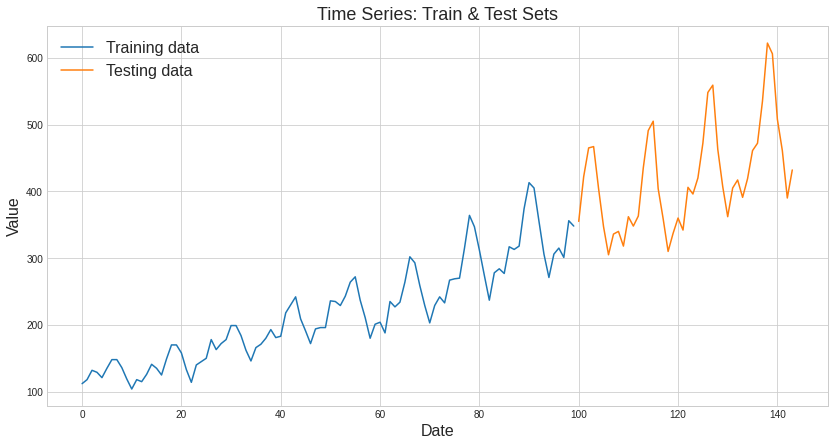

In [4]:
# visualize split on line plot
plt.figure(figsize=(14,7))
plt.plot(train.index, train["Passengers"], label="Training data")
plt.plot(test.index, test["Passengers"], label="Testing data")
plt.title("Time Series: Train & Test Sets", fontsize=18)
plt.legend(fontsize=16)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.show()

## Multiple Train-Test Split

We can split the time series into multiple training and test datasets to train an ensemble model for a more robust estimate. This approach requires multiple models to be developed using respective splits. This could be done manually by repeating the above process. For example, we have a dataset with 20 observations at 20 time periods, we can create 3 different train-test splits as below.

- 50:50 (10 each)
- 60:40 (12 and 8)
- 70:30 (15 and 5)

<img src="https://raw.githubusercontent.com/lucaskienast/Time-Series-Analysis/main/2)%20Evaluation%20Frameworks/Multiple%20Train-Test%20Split.jpeg">

These splits can be used to build 3 different models and output can be averaged out to get a robust prediction. In Python, the sci-kit-learn library can help us with its TimeSeriesSplit function to create multiple splits, we just need to specify the number of splits. As per sci-kit-learn official page, the total number of training and test observations are calculated in each split iteration (i) as follows:

`Train_size=i * n_samples // (n_splits + 1) + n_samples % (n_splits + 1)`

`Test_size= n_samples//(n_splits + 1)`

<img src="https://raw.githubusercontent.com/lucaskienast/Time-Series-Analysis/main/2)%20Evaluation%20Frameworks/Cross%20Validation%20on%20Time%20Series.png">

Where ‘n_samples’ is the total number of observations and ‘n_splits’ is the total number of splits. Assume we have 100 observations and wanted to create 3 splits. Let’s apply above arithmetic to calculate the training and test dataset sizes.

`train_size_1 = 1*100/(3+1) + 100 mod(3+1) = 25`

`test_size_1 = 100/(3+1) = 25`

`train_size_2 = 2*100/(3+1) + 100 mod(3+1) = 50`

`test_size_2 = 100/(3+1) = 25`

`train_size_3 = 3*100/(3+1) + 100 mod(3+1) = 75`

`test_size_3 = 100/(3+1) = 25`


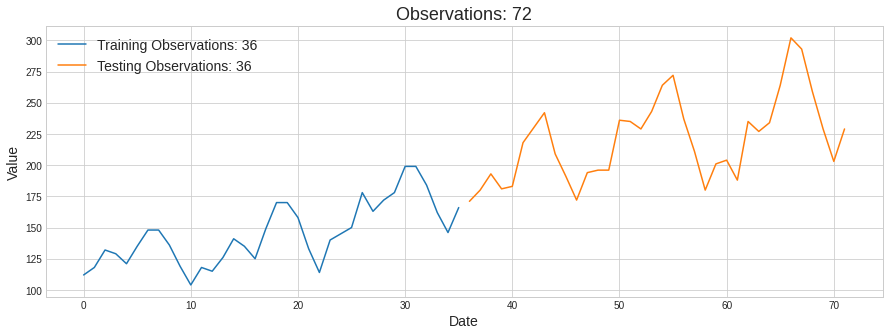

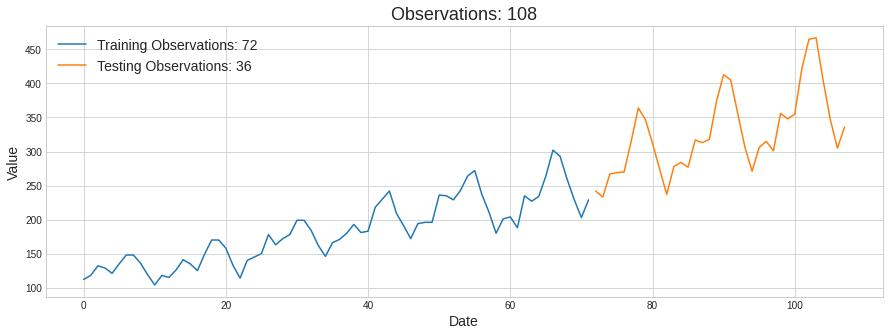

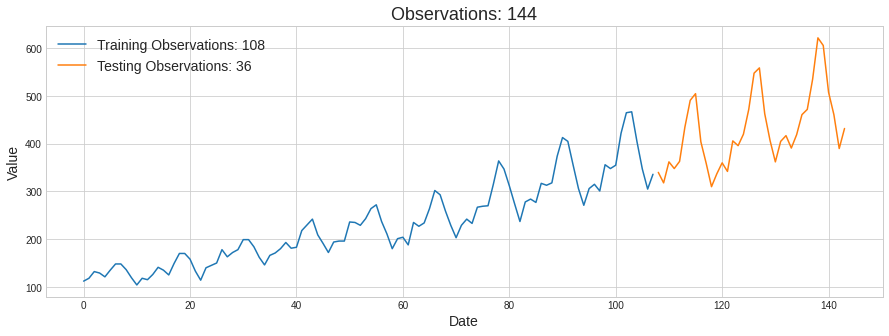

In [5]:
# TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=3)
index = 1

for train_index, test_index in splits.split(df):
  # create datasets
  train = df.iloc[train_index]
  test = df.iloc[test_index]
  # visualize split on line plot
  plt.figure(figsize=(15,5))
  plt.plot(train.index, train["Passengers"], label="Training Observations: {}".format(train.shape[0]))
  plt.plot(test.index, test["Passengers"], label="Testing Observations: {}".format(test.shape[0]))
  plt.title("Observations: {}".format(train.shape[0]+test.shape[0]), fontsize=18)
  plt.legend(fontsize=14)
  plt.xlabel("Date", fontsize=14)
  plt.ylabel("Value", fontsize=14)
  plt.show()

## Time Series Cross Validation

A more sophisticated version of training and test split is time-series cross-validation, this is also known as walk-forward validation as it involves moving along the time series one-time step at a time. This approach provides the best opportunity to make forecasts at each time step. We can see that many more splits are created and we can train an equally high number of models. Again, this will help us in providing a much more robust estimation. Walk- forward method is considered to best model evaluation, this is also known as k-fold cross-validation of time series world.

<img src="https://raw.githubusercontent.com/lucaskienast/Time-Series-Analysis/main/2)%20Evaluation%20Frameworks/Single%20Step%20Cross%20Validation.jpeg">

The forecast accuracy is estimated by averaging across test sets. Before creating this validation framework we have to decide which historical observations we are interested in.

- First, we must decide the minimum number of observations required to train our model, i.e., window width.
- Next, we must decide whether we want a sliding window (most recent observations) or an expanding window (all historical observations).

In [6]:
# walk forward train-test splits
n_train = 100
n_records = df.shape[0]

for i in range(n_train, n_records):
  train = df.iloc[:i]
  test = df.iloc[i:i+1]
  print("Train: {}, Test: {}".format(train.shape[0], test.shape[0]))

Train: 100, Test: 1
Train: 101, Test: 1
Train: 102, Test: 1
Train: 103, Test: 1
Train: 104, Test: 1
Train: 105, Test: 1
Train: 106, Test: 1
Train: 107, Test: 1
Train: 108, Test: 1
Train: 109, Test: 1
Train: 110, Test: 1
Train: 111, Test: 1
Train: 112, Test: 1
Train: 113, Test: 1
Train: 114, Test: 1
Train: 115, Test: 1
Train: 116, Test: 1
Train: 117, Test: 1
Train: 118, Test: 1
Train: 119, Test: 1
Train: 120, Test: 1
Train: 121, Test: 1
Train: 122, Test: 1
Train: 123, Test: 1
Train: 124, Test: 1
Train: 125, Test: 1
Train: 126, Test: 1
Train: 127, Test: 1
Train: 128, Test: 1
Train: 129, Test: 1
Train: 130, Test: 1
Train: 131, Test: 1
Train: 132, Test: 1
Train: 133, Test: 1
Train: 134, Test: 1
Train: 135, Test: 1
Train: 136, Test: 1
Train: 137, Test: 1
Train: 138, Test: 1
Train: 139, Test: 1
Train: 140, Test: 1
Train: 141, Test: 1
Train: 142, Test: 1
Train: 143, Test: 1


Also see: https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

<img src="https://raw.githubusercontent.com/lucaskienast/Time-Series-Analysis/main/2)%20Evaluation%20Frameworks/Time%20Series%20Validation%20Techniques.png">